# Logistic Regression Classification
- Binary Classification =>  0 veya 1
- En küçük Neural Network.
- Bu datayı şimdi dersi analatırken  anlatıcam. Classiifaction yaparken birden fazla data tipi var. Bunlar mesela image. İleride kanser datasını ayırt etmeyi öğreticez. 
- Datamız'da 0 ve 1 ile gösterilen resimler var. Bu şimdi 1. Bunun labeli 1. Benim datamda 1 olarak geçiyor. Daha sonra bu resimler px'lerden oluşuyor. Bu px'ler 0-1 arasında yer alır.

In [29]:
from IPython.display import Image
Image(url="./img/linear_reg_classification.jpg")

---
## Computation Graph
- Matematiksel ifadeleri görselleştirmek için kullanırız.
- a^2 + b^2 = Square Root

In [30]:
Image(url="./img/linear_reg_classification2.jpg")

- **Amaç:** Modeli test veya train etmek.
- Benim 4096px boyutunda bir tane resmim var.
- Train etmek ne demek => Bu resmi kendi modeline uygulamak
- Benim px1,px2... yani bunlar 4096 feature. Bunların hepsini w1,w2... ile çarpıyoruz. Daha sonra SUM işlemi yapıyoruz.
- b =>  bias
- z = b + px1.w1 + px2.w2 ... px4096.w4096
- Parametreler weight ve bias.
- w'ler katsayıları temsil ediyor.
- Sigmoid Function => Bizim sayımızı 0-1 arasında bir değere eşitler.
- 0.5 üstü 1 olsun, 0.5 altı 0 olsun.

---
## Forward Propagation
- z = (w.T)x + b <br> T = Transpose
- Eğer sen 1 resmini yolladıysan(predict) senin loss değerin 0'dır. Eğer 0 yolladıysa ve bu da doğru çıkıtysa loss yine 0'dır. Yani doğrular 0 ile simgelenir.
- -(1-y)log(1-y)-y.log(y)

## Backward Propagation
- Benim modelim weigth ve bias'ı öğrenmek zorunda. Bu parametreler için cost'u azaltıyor.

In [31]:
Image(url="./img/linear_reg_classification3.jpg")

- Azaltma işlemini w'leri azaltarak değerlerini yaparız.
- w := w - step <br> step = slope1
- slope => Eğim demektir.
- Minumum noktaya ulaşana kadar w değerlerini azaltıyorum.
- First Step  => w=5, slope1=3   |  w - slope1 = 5 - 3   = 2 , cost = 0.4 (not min) <br>
  Second Step => w=2, slope2=0.7 |  w - slope2 = 2 - 0.7 = 1.3,  cost = 0.3 (not min) <br>
  Third Step  => w=1.3, slope3=0.01 | w - slope3 = 1.3 - 0.01 = 1.29
- Slope3=0.01 bakarsak burada neredeyse değişim yoktur. Bu durumda min noktaya ulaşılmıştır.
- Backward propagation yaparken önemli olan parametreleri güncellemektir.

---

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("LogisticRegressionDataset.csv",sep=",");
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


> M = Kötü huylu tümör <br>
> B = İyi huylu tümör

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

> Data'nın içinde ki bazı veriere ihtiyacım yok. Boş olanları çıkartıyoruz ilk olarak. <br>
> axis = 1 => column drop etmek <br>
> axis = 0 => row drop etmek

In [34]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


> İyi ve kötü huylu tümörleri sayısal olarak ifade etmemiz data'yı daha iyi kontrol etmemizi sağlar. Aynı zamanda diagnasis satırı bir objedir. Ve objeleri sınıflandırmada kullanamıyoruz. Bu yüzden bunları sayısal ifadeye çeviriyorum.
<br>
> 1 => Kötü huylu <br> 
> 0 => İyi huylu

In [35]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [37]:
## Normalization: Tüm dataları 0-1 arasında ki değerlere atmaktır.
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [38]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
# hocanın anlattığı mantıkla aynı olsun diye yapılı. Bir mantığı yok.
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T.reshape(-1,1)
y_test = y_test.T.reshape(-1,1)

In [40]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (30, 455)
x_test (30, 114)
y_train (455, 1)
y_test (114, 1)


In [41]:
# parameter initiazlize and sigmoid function: featurları w ile çarpıp bias ile toplama
# bu data'ya göre deimension = 30
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) # np.full((row,column),value)
    b = 0.0 # int değilde float olsun diye yazdı. Çok önemli değil.
    return w,b

In [42]:
# w,b = initialize_weights_and_bias(30)

In [43]:
# sigmoid function
# z = 0-1 arasında bir değer döndürür
def sigmoid(z):
    y_head = 1/(1+np.exp(-z)) # exp = üstü , bu y_head formulden geliyor
    return y_head

In [44]:
# 0 değerini aldığında bize 0.5 dönmesi gerekiyor. Kontrol edelim.
sigmoid(0)

0.5

In [45]:
# 6 değerini aldığında 1'e yakın bir değer döndürmesi gerekiyor. Kontrol edelim.
sigmoid(6)

0.9975273768433653

In [1]:
def forward_backward_propagation(w,b,x_train,y_train): # y_train=en sonda karşılaştrma için kullanılır
    # forward propagation
    z = np.dot(w.T,x_train) + b # (1,30)*(30,455)
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) # formül
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1] = 455
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # cost sonucunun türevi,formül
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1] # bias sonucunun türevi
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost,gradients

In [47]:
# updating(learning) parameters
# learning_rate => öğrenme katsayısı
# number_of_iterarion => kaç kez ileri geri yapacağım
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iteration cost and gradients
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bian']
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [48]:
# prediction
def predict(w,b,x_test):
    # x_test: kanser olup olmadığı belli olmayan 0-1 değerleri hariç bütün özellikler
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1])) # 0-1 değerlerini içinde tutar
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0)
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 319.889363


C:\Users\mfurk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\mfurk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 10: nan
Cost after iteration 20: 2432.105447
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


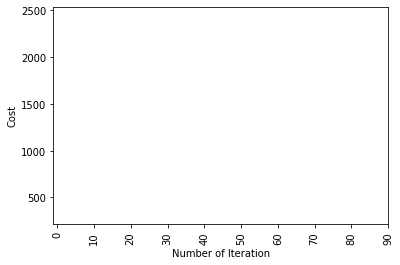

test accuracy: 62.280701754385966 %


In [52]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    # initialize
    dimension = x_train.shape[0] # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters['weight'],parameters['bias'],x_test)
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test))*100))
    
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=100)

In [75]:
# Yukardakilerin kısa yolu, sklearn kullanımı
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train.T,y_train.T)
print("Test accuracy: {}".format(lr.score(x_test.T,y_test.T)))

ValueError: Found input variables with inconsistent numbers of samples: [30, 455]

In [76]:
x_train.shape

(455, 30)

In [77]:
y_train.shape

(455,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

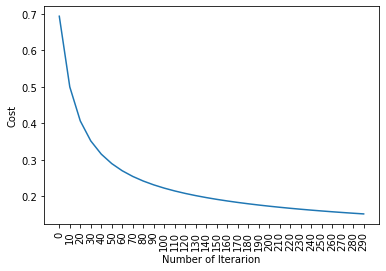

test accuracy: 96.49122807017544 %


In [79]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 12 21:06:37 2018

@author: user
"""

# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% read csv
data = pd.read_csv("LogisticRegressionDataset.csv")
data.drop(["Unnamed: 32","id"],axis=1,inplace = True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
print(data.info())

y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %% normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

# (x - min(x))/(max(x)-min(x))

# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

# %% parameter initialize and sigmoid function
# dimension = 30
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b


# w,b = initialize_weights_and_bias(30)

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head
# print(sigmoid(0))

# %%
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

#%% Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# %% logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)    

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9824561403508771
